# EDA and Model 

*In this part of the project, we will conduct an exploratory analysis of the worked database. Initially, we performed a preliminary exploratory analysis of a dataset related to the distribution of charging stations. This dataset was obtained through an API, containing over 70,000 elements and more than 70 columns. We primarily extracted essential information for the dependent variables intended for use in this project. Additionally, we identified the need for more information, which led us to complete the data through web scraping using another tool. Subsequently, using SQLAlchemy, we proceeded with the processing and merging of this information.
Following the exploratory analysis, we will create two datasets: test and training. This step is necessary to work with the chosen model and achieve the desired prediction.*

## Data importation and first inspection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/workspaces/Machine-Learning-Final-Project/data/csv/final_merged_data.csv')
print(df.shape)
print(df.info())
df.head()

(50, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state_ab                  50 non-null     object
 1   Total_EV_Level1_EVSE_Num  50 non-null     int64 
 2   Total_EV_Level2_EVSE_Num  50 non-null     int64 
 3   Total_EV_DC_FastCount     50 non-null     int64 
 4   stations_number           50 non-null     int64 
 5   state_name                50 non-null     object
 6   id                        50 non-null     int64 
 7   area                      50 non-null     int64 
 8   electric                  50 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 3.6+ KB
None


,state_ab,Total_EV_Level1_EVSE_Num,Total_EV_Level2_EVSE_Num,Total_EV_DC_FastCount,stations_number,state_name,id,area,electric
0,AK,3,91,36,67,Alaska,2,665384,2000
1,AL,35,744,395,466,Alabama,1,52420,8700
2,AR,3,724,134,341,Arkansas,4,53179,5100
3,AZ,10,2672,1063,1318,Arizona,3,113990,65800
4,CA,668,41181,11431,17878,California,5,163695,903600


In [3]:
df.columns

Index(['state_ab', 'Total_EV_Level1_EVSE_Num', 'Total_EV_Level2_EVSE_Num',
       'Total_EV_DC_FastCount', 'stations_number', 'state_name', 'id', 'area',
       'electric'],
      dtype='object')

## Verification of variables with all null values 

In [4]:
# Check for columns with all null values
columns_with_null = df.columns[df.isnull().all()]
print(len(columns_with_null))
print("Columns with all null values:")
print(columns_with_null)

0
Columns with all null values:
Index([], dtype='object')


*No variables with null values*


## Analysis of variables 

### Analysis of Categorical Variables

In [7]:
categorical_variables = df.select_dtypes(include='object').columns.tolist()
print(len(categorical_variables))
print(categorical_variables)

2
['state_ab', 'state_name']


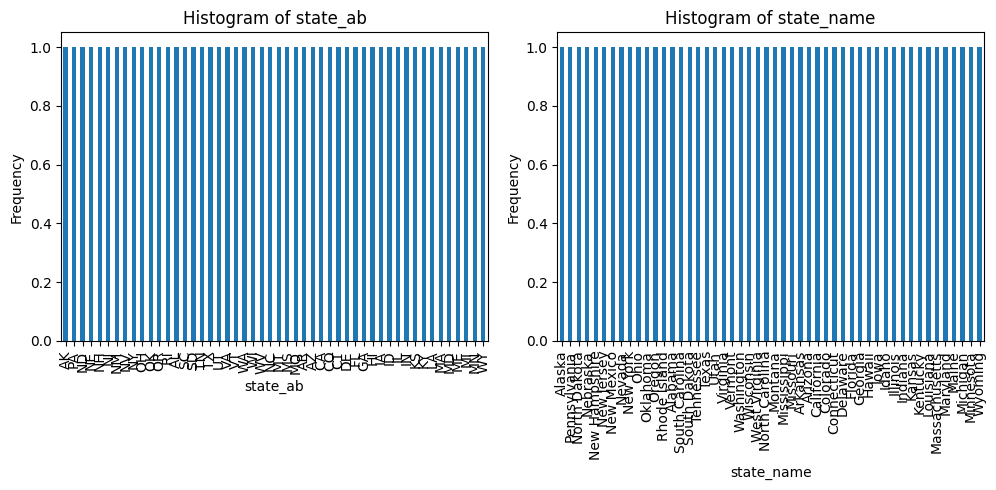

In [10]:
import matplotlib.pyplot as plt

# Define the categorical variables
categorical_variables = df.select_dtypes(include='object').columns.tolist()

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_variables)
num_cols = 3  # Number of columns for subplots
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each categorical variable and plot histogram
for i, var in enumerate(categorical_variables):
    ax = axes[i]  # Select the current axis
    df[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Analysis of Numeric Variables

In [11]:
numeric_variables = df.select_dtypes(include='number').columns.tolist()
print(len(numeric_variables))
print(numeric_variables)

7
['Total_EV_Level1_EVSE_Num', 'Total_EV_Level2_EVSE_Num', 'Total_EV_DC_FastCount', 'stations_number', 'id', 'area', 'electric']


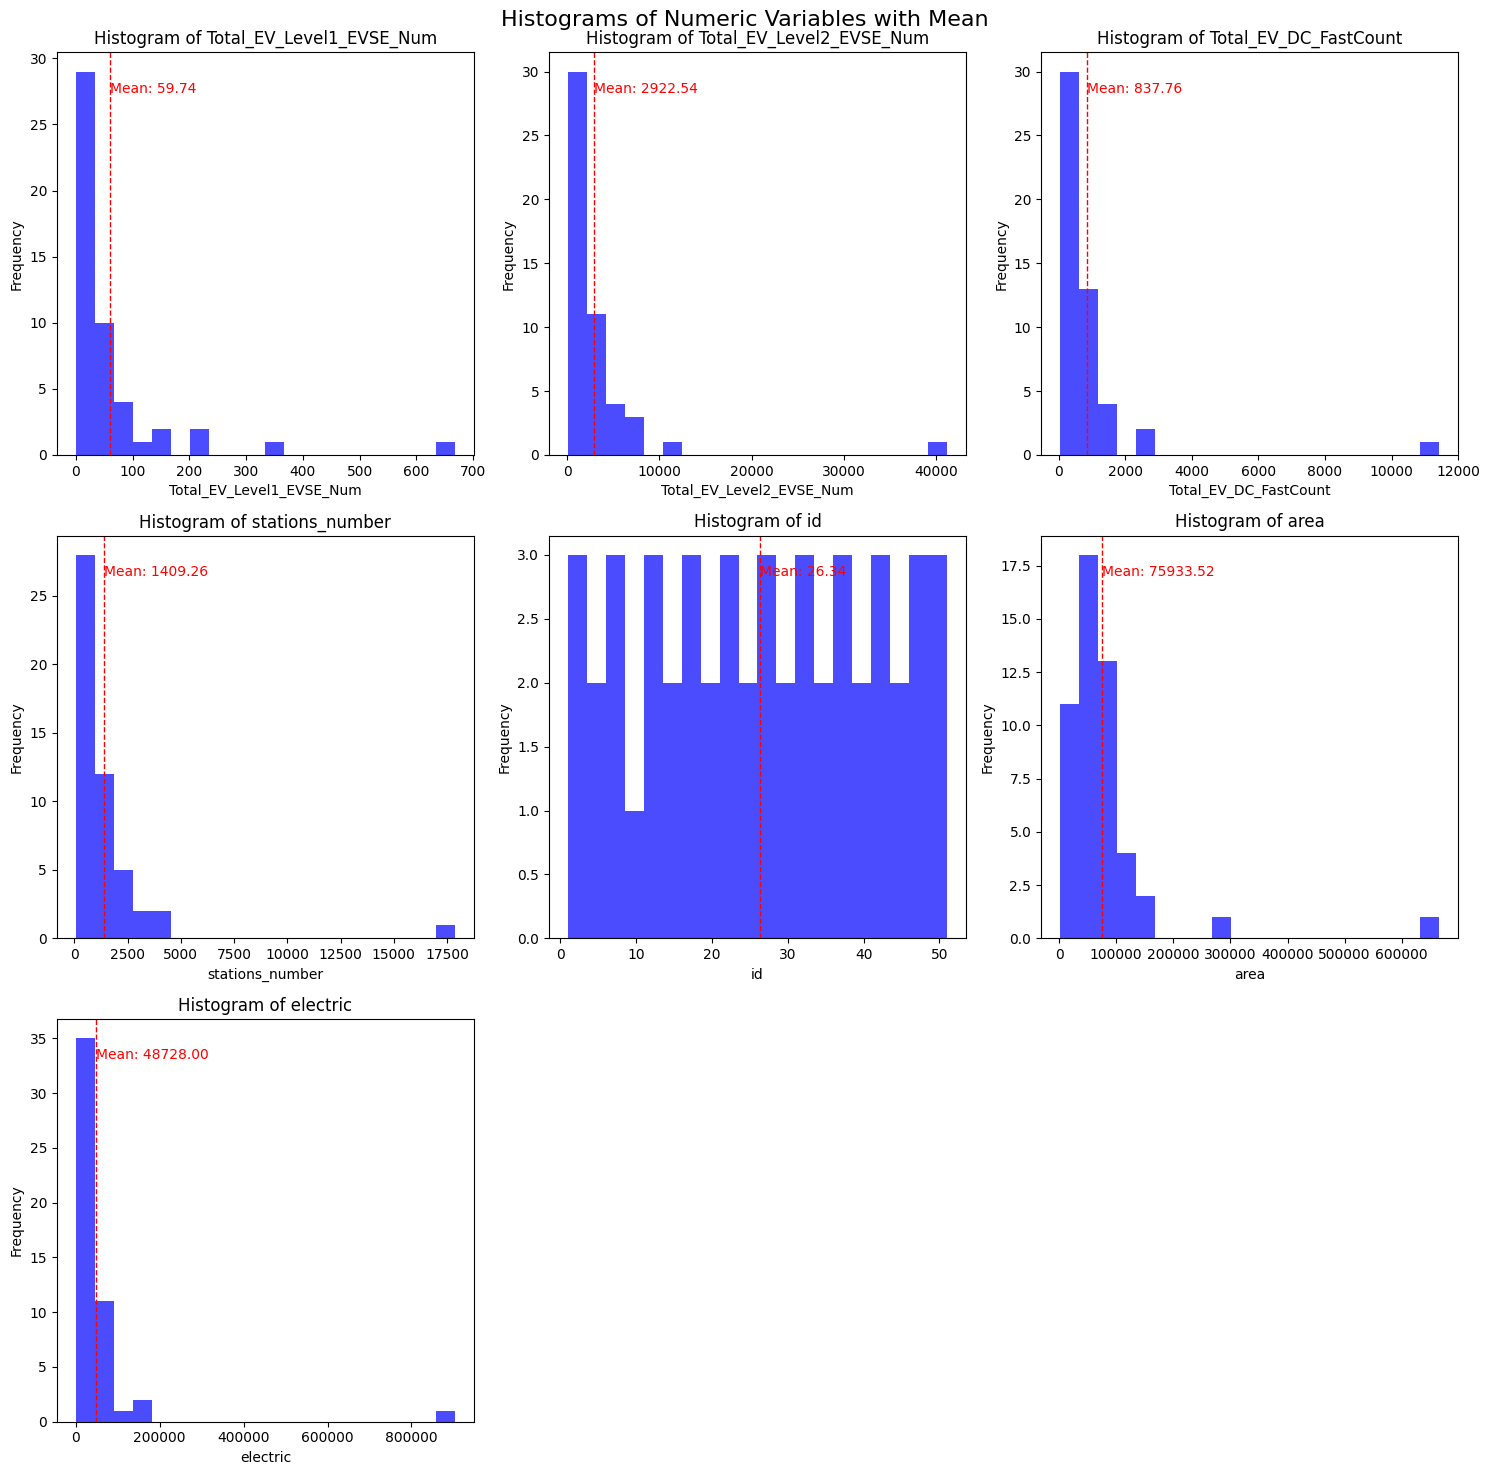

In [13]:
import numpy as np

# Define the numeric variables
numeric_variables = df.select_dtypes(include='number').columns.tolist()

# Calculate the number of rows and columns for subplots
num_plots = len(numeric_variables)
num_cols = 3  # Number of columns for subplots
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each numeric variable and plot histogram
for i, var in enumerate(numeric_variables):
    ax = axes[i]  # Select the current axis
    ax.hist(df[var], bins=20, alpha=0.7, color='blue')
    
    # Add mean to the histogram
    mean_value = df[var].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    ax.text(mean_value, ax.get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='red', fontsize=10)
    
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

# Add main title
fig.suptitle('Histograms of Numeric Variables with Mean', fontsize=16)

plt.tight_layout()
plt.show()


## Variables Stadistics

### Dataframe stadistics

In [14]:
# Define the list of columns you want to calculate statistics for
columns_to_analyze = df.columns[:43]  # Adjust the range as needed

# Define a function to calculate statistics for a single column
def calculate_statistics(column):
    if df[column].dtype == 'object':
        value_counts = df[column].value_counts()
        mode = value_counts.index[0]
        mode_count = value_counts.iloc[0]
        unique_count = len(value_counts)
        missing_values = df[column].isnull().sum()
        
        return {
            "Column": column,
            "Mode": mode,
            "Mode Count": mode_count,
            "Unique Count": unique_count,
            "Missing Values": missing_values
        }
    else:
        median = df[column].median()
        mode = df[column].mode().iloc[0]
        mean = df[column].mean()
        std_dev = df[column].std()
        skewness = df[column].skew()
        kurtosis = df[column].kurtosis()
        
        return {
            "Column": column,
            "Median": median,
            "Mode": mode,
            "Mean": mean,
            "Standard Deviation": std_dev,
            "Skewness": skewness,
            "Kurtosis": kurtosis
        }

# Iterate over the columns and calculate statistics
statistics_results = []
for column in columns_to_analyze:
    statistics_results.append(calculate_statistics(column))

# Convert the results to a DataFrame
statistics_df = pd.DataFrame(statistics_results)

# Print the results
print(statistics_df)

                     Column    Mode  Mode Count  Unique Count  Missing Values  \
0                  state_ab      AK         1.0          50.0             0.0   
1  Total_EV_Level1_EVSE_Num       3         NaN           NaN             NaN   
2  Total_EV_Level2_EVSE_Num      91         NaN           NaN             NaN   
3     Total_EV_DC_FastCount     485         NaN           NaN             NaN   
4           stations_number      67         NaN           NaN             NaN   
5                state_name  Alaska         1.0          50.0             0.0   
6                        id       1         NaN           NaN             NaN   
7                      area    1545         NaN           NaN             NaN   
8                  electric    5900         NaN           NaN             NaN   

    Median      Mean  Standard Deviation  Skewness   Kurtosis  
0      NaN       NaN                 NaN       NaN        NaN  
1     22.0     59.74          111.915568  3.954483  18.483967